# Agent-Base Models (ABMs)

- ABMs consist of a population of agents, each with its own properties and behavior. Agents interaction with each other and with their environment according to these rules, leading to emergent system dynamics.
- Like a modeling approach for object-oriented programming (OOP).

##  Python classes
Classes are Python's approach to OOP. A class defines properties and behavior of the objects it creates:

In [2]:
class Agent:
    def __init__(self, properties):   # this is the "constructor" which is used to initialize the object
        self.properties = properties  # use "self" for instance variables 

    def behavior(self, input):
        # do something here
        self.properties + input
        pass

# we can create an instance like this:
agent1 = Agent(properties = 1)
agent1.behavior(input=1)

## Example: Quorum sensing

Quorum sensing is a mechanism of cell-to-cell communication that lets them coordinate their behavior based on local density of their population. Through the production, release, and detection of chemical signals, bacteria can regulate gene expression collectivelsy, leading to behavior such as biofilm formation, virulence, and bioluminescence.

In [3]:
import numpy as np
import io
import base64
import imageio
from IPython.display import HTML, display
import matplotlib.pyplot as plt

In [68]:
class MicrobeAgent:
    def __init__(self, position, detected_distance=1):

        # positional information
        self.position = np.array(position)
        self.detected_distance = detected_distance

        # autoinducer information
        self.autoinducer_concentration = 0
        self.autoinducer_production = np.random.uniform(0.01, 0.1)
        self.autoinducer_threshold = np.random.uniform(1, 5)  # sensitivty to quorum sensing
        self.activated = False

        # history
        self.history = {
            'position': [self.position.copy()],
            'activated': [self.activated],
        }

    def move(self, boundary):
        movement = np.random.uniform(-0.5, 0.5, size=2)      # move in a random direction
        self.position += movement                            # update the position
        self.position = np.clip(self.position, 0, boundary)  # enforce the boundary

    def update_history(self):
        self.history['position'].append(self.position.copy())
        self.history['activated'].append(self.activated)

    def produce_autoinducer(self):
        self.autoinducer_concentration += self.autoinducer_production
        
    def sense_environment(self, microbial_community):
        sensed_concentration = 0
        for microbe in microbial_community:
            distance = (
                (self.position[0] - microbe.position[0])**2 +
                (self.position[1] - microbe.position[1])**2
            )**0.5 
            
            if distance < self.detected_distance and distance != 0:
                sensed_concentration += microbe.autoinducer_concentration

        # print(sensed_concentration)
        # if sensed concentration is above threshold, quorum sensing is True
        quorum_sensing = sensed_concentration >= self.autoinducer_threshold
        return quorum_sensing
        
    def act(self, quorum_sensing):
        if quorum_sensing:
            self.activated = True
        else:
            self.activated = False


def simulate_microbial_community(
    steps=100, 
    community_size=100, 
    environment_size=10,
    detected_distance=1,
):
    """Run an agent-based simulation and return the population of microbes"""
    # initialize the microbes
    microbial_community = []
    for i in range(community_size):
        microbe = MicrobeAgent(position=np.random.rand(2)*environment_size,
                              detected_distance=detected_distance)
        microbial_community.append(microbe)

    # run the simulation
    for step in range(steps):
        for microbe in microbial_community:
            microbe.move(boundary=environment_size)
            microbe.produce_autoinducer()

        for microbe in microbial_community:
            quorum_sensing = microbe.sense_environment(microbial_community)
            microbe.act(quorum_sensing)
            microbe.update_history()

    return microbial_community


def create_gif(microbial_community, environment_size, filename="simulation.gif"):
    images = []
    steps = len(microbial_community[0].history['position'])
    
    # Define a minimum figure size to ensure visibility
    fig_scale = 0.4  # Adjust this value to change figure size proportionally
    fig_size = (environment_size * fig_scale, environment_size * fig_scale)
    
    for step in range(steps):
        fig, ax = plt.subplots(figsize=fig_size)
        ax.set_xlim(0, environment_size)
        ax.set_ylim(0, environment_size)
        ax.set_aspect('equal')  # Maintain aspect ratio
        for microbe in microbial_community:
            pos = microbe.history['position'][step]
            color = 'ro' if microbe.history['activated'][step] else 'go'
            ax.plot(pos[0], pos[1], color, markersize=6)  # Use color based on activation state
        
        # Save figure to buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120, bbox_inches='tight')
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)
    
    # Create and save the GIF
    imageio.mimsave(filename, images, duration=0.1, loop=0)

    # Display the GIF in a Jupyter notebook
    with open(filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    display(HTML(f'<img src="{data_url}" alt="Microbial Simulation" style="max-width:100%;"/>'))

In [70]:
env_size=5
microbial_community1 = simulate_microbial_community(
    community_size=10, 
    environment_size=env_size,
    steps=200,
    detected_distance=3)

In [71]:
# microbial_community1[2].history

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_470/1893443430.py:105: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



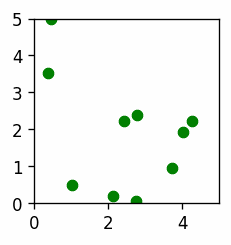

In [72]:
create_gif(microbial_community1, environment_size=env_size)

In [73]:
env_size2=10
microbial_community2 = simulate_microbial_community(
    community_size=10, 
    environment_size=env_size2,
    steps=200,
    detected_distance=2)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_470/1893443430.py:105: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



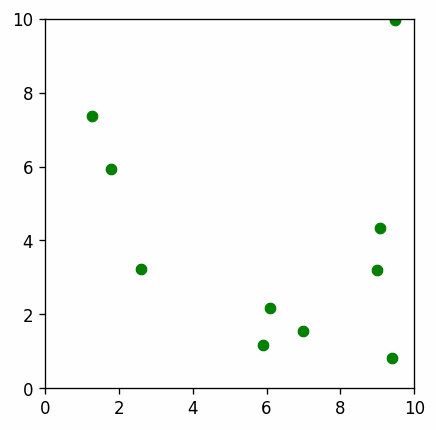

In [74]:
create_gif(microbial_community2, environment_size=env_size2)

In [5]:
env_size1 = 5
microbial_community1 = simulate_microbial_community(
    community_size=10, 
    environment_size=env_size1,
    steps=100)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_470/3780584960.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



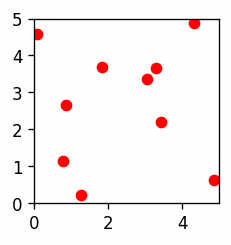

In [6]:
create_gif(microbial_community1, environment_size=env_size1)

In [7]:
env_size2 = 10
microbial_community2 = simulate_microbial_community(
    community_size=100, 
    environment_size=env_size2)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_470/3780584960.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



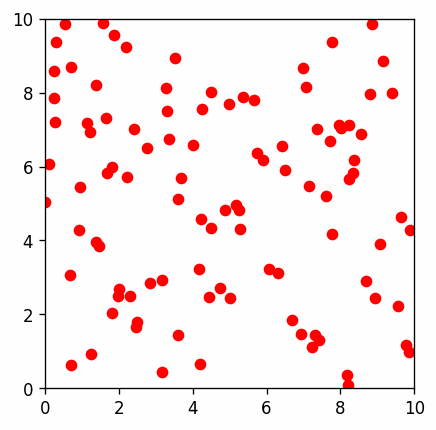

In [8]:
create_gif(microbial_community2, environment_size=env_size2)

In [9]:
env_size = 10

position = np.random.rand(2)*env_size
microbe = MicrobeAgent(position=position)

In [10]:
for step in range(10):

    microbe.move(boundary=env_size)
    print(microbe.position)

[8.98205503 6.31280641]
[8.66871207 6.25716458]
[8.95634083 6.6900502 ]
[8.83939682 6.50421975]
[9.22178447 6.52687942]
[9.35048238 6.67963826]
[9.78244919 7.01088097]
[9.83028236 7.25935279]
[10.          7.27312435]
[10.          7.69023447]
